### 5.2 Potentials and fields near Electric charges, Poisson’s Equation 

In [1]:
using PyPlot
#gr()

In [2]:
function point_charge_update(V, rho, delta_x)
    # This function takes a matrix V and solves Poisson's equation. It needs rho and delta_x  
    #the charge distribution and spatial step size also. It returns the 
    # processed matrix to the  calling function, together with the value of delta_V, 
    # the total accumulated amount by which the elements 
    # of the matrix have changed     
    
    x_size = size(V,1); 
    y_size = size(V,2); 
    z_size = size(V,3);   # preallocate memory for speed    
    
    V_new=zeros(x_size, y_size, z_size); delta_V_new=0;   
    
    # Move along the matrix, element by element  computing  Eq 5.20, ignoring 
    # boundaries. Note the use of a,b,c instead of i,j,k since i and j are 
    # already defined in MATLAB   
    
    for c=2:z_size-1;     
        for b =2:y_size-1;         
            for a=2:x_size-1;                          
                # calculate V_new and cumulative delta_V_new to test for convergence                 
                V_new[a,b,c] = 
                    (V[a-1,b,c]+V[a+1,b,c] +
                     V[a,b+1,c]+V[a,b-1,c] +
                     V[a,b,c+1]+V[a,b,c-1])/6 + 
                     rho[a,b,c]*delta_x^2/6 ;
                delta_V_new= delta_V_new+abs(V_new[a,b,c]-V[a,b,c])               
            end         
        end     
    end
    return V_new, delta_V_new
end

point_charge_update (generic function with 1 method)

In [3]:
function point_charge_coulomb() 
    # This function takes a matrix V and solves Poisson's equation. It needs rho and delta_x  
    #the charge distribution and spatial step size also. It returns the 
    # processed matrix to the  calling function, together with the value of delta_V, 
    # the total accumulated amount by which the elements % of the matrix have changed 
    
    x=range(0, step = 0.05, stop = 2)
    
    # Since q/epsillon_zero=1  
    V= 1 ./(4*pi*x)
    return V, x
end

point_charge_coulomb (generic function with 1 method)

In [4]:
#=
i = 0
loops = 20
while (i < 20)
    global loops
    
    loops=loops+1
    display(loops)
    i = i + 1
           
end
=#

In [ ]:
#display(coulomb[1]')

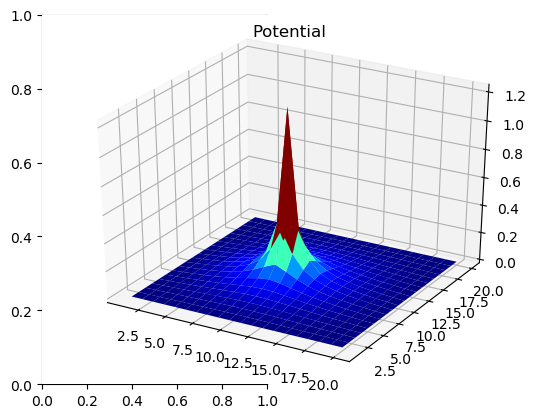

PyObject Text(0.5, 0.92, 'Potential')

In [90]:
#  Jacobi method to solve Poisson's  equation 
#  based on 'Computational Physics' book by N Giordano and H Nakanishi     

# This code creates the intial potential and charge 3D matrices and 
# definitions. The matrix  is 3D of length 20

delta_x=0.2;    # spatial step size 
convergence_per_site=1e-6;  
rho=zeros(20,20,20);     # Create box to contain charge 

rho[10,10,10]=(1/delta_x^3);  # place charge of 1 at centre of box shaped volume 

# Create Potential matrix 
V_matrix=zeros(20,20,20)


# run Update routine for the first time and calculate convergence metric   
V_new, delta_V_new = point_charge_update(V_matrix, rho, delta_x)  

#Initialise loop counter  
loops=1 

#  While we have not met the convergence criterion and the number of loops is <20 so that we give the   
# algorithm time to converge
 
while ((delta_V_new > convergence_per_site .*size(V_matrix,2)^3) || (loops < 20))
    global V_new
    global delta_V_new
    
    #display(loops)
    #display(delta_V_new)
    #display(convergence_per_site .*size(V_matrix,2)^3)
    loops=loops+1             
    V_new, delta_V_new=point_charge_update(V_new, rho, delta_x);           
end



# Run the routine to plot the potential as calculated analytically using Coulomb's Law        
coulomb, r = point_charge_coulomb()
slice = V_new[:, :, 10] 

#display(slice)
# Visualise result by taking a slice half way up the cube.

#=
gr(show = :ijulia)
plotly()
plotly(show = :ijulia)
=#

grid(true)
subplot(121)
surf(slice,cmap="jet")
title("Potential")

#=
grid(true)

#subplot(121);        
#surface(slice, title = "Potential");          

view(3);         
axis on;         
grid on;         
light;         
lighting phong;         
camlight('left');         
shading interp;            
=#

# take a cutline across the slice surface and plot
#=
subplot(1,2,2); 

cut_slice=slice(10, 10:20);        
rescale=[0:0.2:2];          
plot(rescale,cut_slice,'og');        
xlabel('x');        
ylabel('V');             
axis([0 2 0 0.8]);        
title('Numerical result and Coulombs Law')        
hold on;                

# Plot Coulomb's law result for comparison                
plot(r,coulomb,'k');        
legend('Numerical results','Coulomb'); 
=#

In [102]:
# Plot Coulomb's law result for comparison                
plot(r,coulomb,'k');        
legend('Numerical results','Coulomb');

PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= C:\Users\Home-laptop\.julia\packages\PyCall\0jMpb\src\pyfncall.jl:44 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'TypeError'>
TypeError("float() argument must be a string or a number, not 'PyCall.jlwrap'",)
  File "C:\Users\Home-laptop\.julia\conda\3\lib\site-packages\matplotlib\pyplot.py", line 2813, in plot
    is not None else {}), **kwargs)
  File "C:\Users\Home-laptop\.julia\conda\3\lib\site-packages\matplotlib\__init__.py", line 1805, in inner
    return func(ax, *args, **kwargs)
  File "C:\Users\Home-laptop\.julia\conda\3\lib\site-packages\matplotlib\axes\_axes.py", line 1604, in plot
    self.add_line(line)
  File "C:\Users\Home-laptop\.julia\conda\3\lib\site-packages\matplotlib\axes\_base.py", line 1891, in add_line
    self._update_line_limits(line)
  File "C:\Users\Home-laptop\.julia\conda\3\lib\site-packages\matplotlib\axes\_base.py", line 1913, in _update_line_limits
    path = line.get_path()
  File "C:\Users\Home-laptop\.julia\conda\3\lib\site-packages\matplotlib\lines.py", line 945, in get_path
    self.recache()
  File "C:\Users\Home-laptop\.julia\conda\3\lib\site-packages\matplotlib\lines.py", line 645, in recache
    y = _to_unmasked_float_array(yconv).ravel()
  File "C:\Users\Home-laptop\.julia\conda\3\lib\site-packages\matplotlib\cbook\__init__.py", line 1365, in _to_unmasked_float_array
    return np.asarray(x, float)
  File "C:\Users\Home-laptop\.julia\conda\3\lib\site-packages\numpy\core\numeric.py", line 501, in asarray
    return array(a, dtype, copy=False, order=order)


In [101]:
cut_slice=slice[10, 10:20];        
rescale=collect(0:0.2:2;)
#display(rescale)
#surf(rescale, cut_slice)
#title("Numerical result and Coulombs Law");


#p3 = scatter!(r,coulomb);

MethodError: MethodError: no method matching surf(::Array{Float64,1}, ::Array{Float64,1})
Closest candidates are:
  surf(::AbstractArray{T,1} where T, ::AbstractArray{T,1} where T, !Matched::AbstractArray{T,2} where T, !Matched::Any...; kws...) at C:\Users\Home-laptop\.julia\packages\PyPlot\fZuOQ\src\PyPlot.jl:250
  surf(::Any, ::Any, !Matched::AbstractArray{T,2} where T, !Matched::Any...; kws...) at C:\Users\Home-laptop\.julia\packages\PyPlot\fZuOQ\src\plot3d.jl:78
  surf(::Any, ::Any, !Matched::AbstractArray{T,1} where T, !Matched::Any...; kws...) at C:\Users\Home-laptop\.julia\packages\PyPlot\fZuOQ\src\plot3d.jl:82
  ...

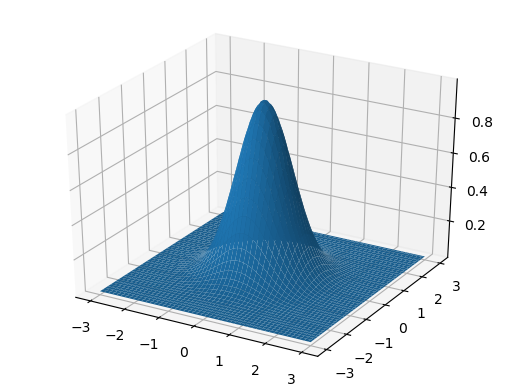

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000006F099D30>

In [85]:
n = 100
x = collect(range(-3, 3, length = n))
y = collect(range(-3,3, length = n))

xgrid = repeat(x',n,1)
ygrid = repeat(y,1,n)

z=@. exp(-xgrid.^2 - ygrid.^2)

surf(x,y,z)

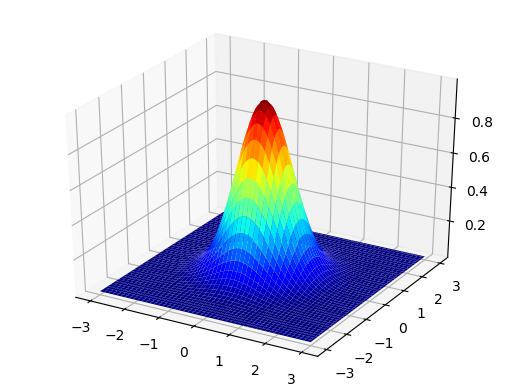

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000006F49C710>

In [86]:
surf(x,y,z,cmap="jet")

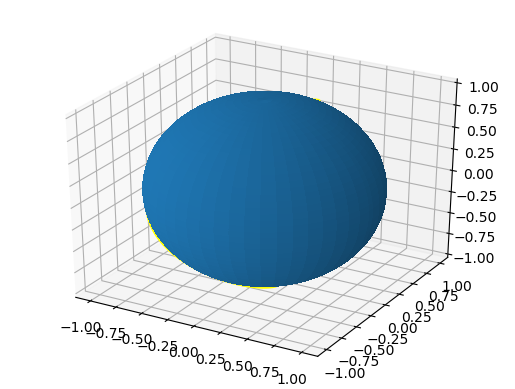

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x00000000621E47F0>

In [78]:
#using PyPlot
n = 100
u = collect(range(0, 2*π, length = n));
v = collect(range(0, π, length = n));

x = @. cos(u) * sin(v)'

y = @. sin(u) * sin(v)'

z = @. ones(n,n)' * cos(v)'

surf(x, y, z, rstride=2, cstride=2, linewidth=0, antialiased=false)#, cmap="coolwarm")

# The rstride and cstride arguments default to 10
#surf(x,y,z, rstride=4, cstride=4)

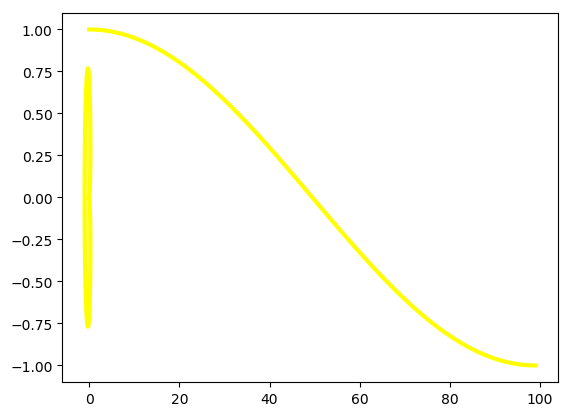

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000006B3C3940>
 PyObject <matplotlib.lines.Line2D object at 0x000000006B3C3A90>

In [82]:
#using LinearAlgebra
plot( diag(x), diag(y), diag(z), color="yellow", linewidth=3 )

In [52]:
#=
#X = linspace(-5, 5, 100)'
#Y = linspace(-5, 5, 100)
X = collect(range(-5, 5, length = 100))
Y = collect(range(-5, 5, length = 100))
R = @. sqrt(X'.^2 .+ Y.^2)
Z = @. sin(R)
surf(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=false, cmap="coolwarm")
=#

#fig = plt.figure()
ax = gca(projection="3d")
X = collect(range(-5, 5, length = 300))
Y = collect(range(-5, 5, length = 300))
#R = collect(range(-2*pi, 2*pi, length = 300))
#X, Y = (X, Y)
R = @. sqrt(X'.^2 + Y.^2)
Z = @. sin(R)
#display(Z)

surf(X, Y, Z, rstride=1, cstride=1, linewidth=1, antialiased=false)
plot3D(X,Y,Z)
#plt.show()


PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= C:\Users\Home-laptop\.julia\packages\PyCall\0jMpb\src\pyfncall.jl:44 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'RuntimeError'>
RuntimeError('Error in qhull Delaunay triangulation calculation: singular input data (exitcode=2); use python verbose option (-v) to see original qhull error.',)
  File "C:\Users\Home-laptop\.julia\conda\3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py", line 1945, in plot_trisurf
    tri, args, kwargs = Triangulation.get_from_args_and_kwargs(*args, **kwargs)
  File "C:\Users\Home-laptop\.julia\conda\3\lib\site-packages\matplotlib\tri\triangulation.py", line 167, in get_from_args_and_kwargs
    triangulation = Triangulation(x, y, triangles, mask)
  File "C:\Users\Home-laptop\.julia\conda\3\lib\site-packages\matplotlib\tri\triangulation.py", line 55, in __init__
    self.triangles, self._neighbors = _qhull.delaunay(x, y)


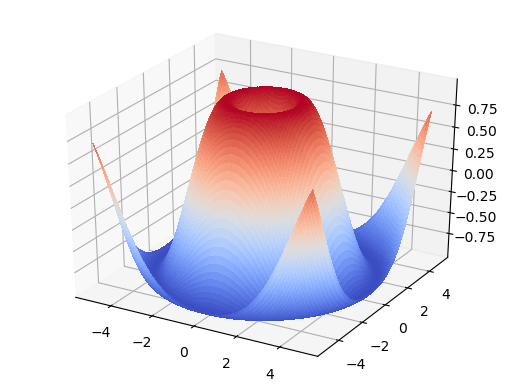

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000220FE320>

In [49]:
#X = linspace(-5, 5, 100)'
#Y = linspace(-5, 5, 100)
X = collect(range(-5, 5, length = 100))
Y = collect(range(-5, 5, length = 100))
R = @. sqrt(X'.^2 .+ Y.^2)
Z = @. sin(R)
surf(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=false, cmap="coolwarm")
#colorbar(surf, shrink=0.5, aspect=5)